# TASK-1 PREDICTION USING SUPERVISED ML

### AUTHOR- SAI ADITYA

To predict the percentage of marks scored by the students based on the number of study hours.

#### Steps to be perfomed:-

1. Data reading and understanding
2. Exploratory Data Analysis
3. Building a  Simple Regression Model
4. Model Evaluation and Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [9]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Exploratory Data Analysis

Visualizing the distribution of scores

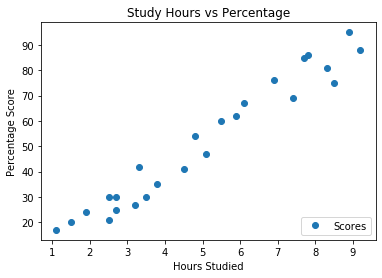

In [12]:
df.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.legend(loc=4)
plt.title('Study Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

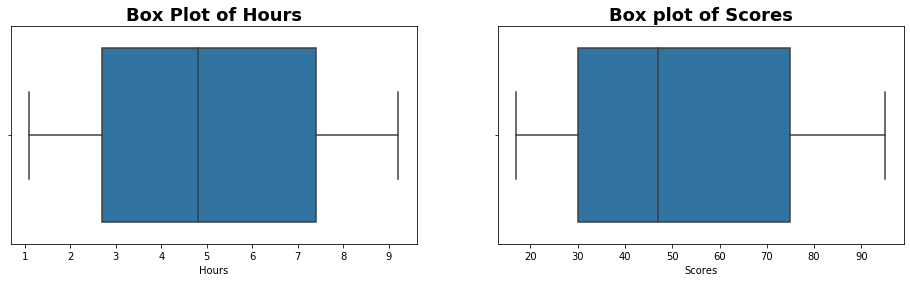

In [15]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.boxplot(x='Hours', data=df)
plt.title('Box Plot of Hours', fontweight='bold', fontsize = 18)
plt.subplot(1,2,2)
sns.boxplot(x='Scores', data=df)
plt.title('Box plot of Scores', fontweight='bold', fontsize = 18)
plt.show()

We can infer there are no outliers in the dataset.
The features 'Hours' and 'Scores' are maintaining a linear relationship, we'll have to find out the correlation between them.

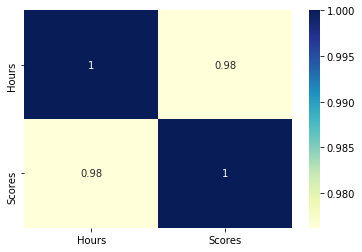

In [16]:
sns.heatmap(df.corr(), cmap='YlGnBu',cannot = True)

The heatmaps shows the strong positive correlation there is between 'Hours' and 'Scores'.

### Modeling: Simple Linear Regression
Y = a + bX, where X is the explanatory variable and y is the dependent variable. The slope of the line is b and a is the intercept.
Scores = a + b * Hours

Split the dataset into train and test set

In [17]:
X = df['Hours']
y = df['Scores']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

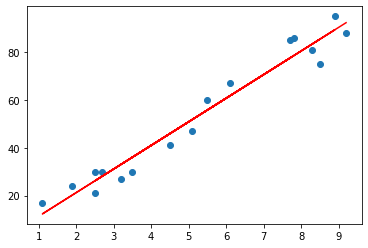

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951+9.8717*X_train, 'r')
plt.show()

### Model training using sklearn

In [20]:
X_train = X_train.values.reshape(-1,1)

In [21]:
lr_model_sk = LinearRegression().fit(X_train, y_train)

In [22]:
print("Intercept of Line:", lr_model_sk.intercept_)
print("Coefficient of Hours:", lr_model_sk.coef_)

Intercept of Line: 1.495142109236383
Coefficient of Hours: [9.87171443]


In [23]:
y_train_pred = lr_model_sk.predict(X_train)
r2score_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2 score using sklearn model:', (r2score_train)*100)

R2 score using sklearn model: 95.70735354094693


### Visualizing the fit for the trained data

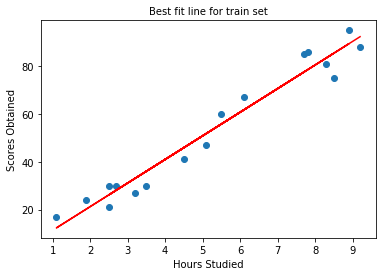

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred,'r')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.title('Best fit line for train set', fontsize = 10)
plt.show()

## Predictions on the test set

In [26]:
X_test = X_test.values.reshape(-1,1)

In [27]:
y_test_pred_sklearn = lr_model_sk.predict(X_test)

In [28]:
predicted_std_score = pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred_sklearn})
predicted_std_score

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [29]:
r2score = r2_score(y_true = y_test, y_pred = y_test_pred_sklearn) 
print('R2_score of test set using SKlearn model:', r2score)

R2_score of test set using SKlearn model: 0.9309458862687437


### Conclusion
R-squared of training set was 95.7% and R-squared of test set is around 93% which is acceptable.

### Final solution to the asked question

In [30]:
hours = np.array(9.25).reshape(1,-1)
pred = lr_model_sk.predict(hours)

In [31]:
print('If the students study 9.25 hours a day they are expected to score:', pred)

If the students study 9.25 hours a day they are expected to score: [92.80850057]
